/root/anaconda3/envs/qiime2/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


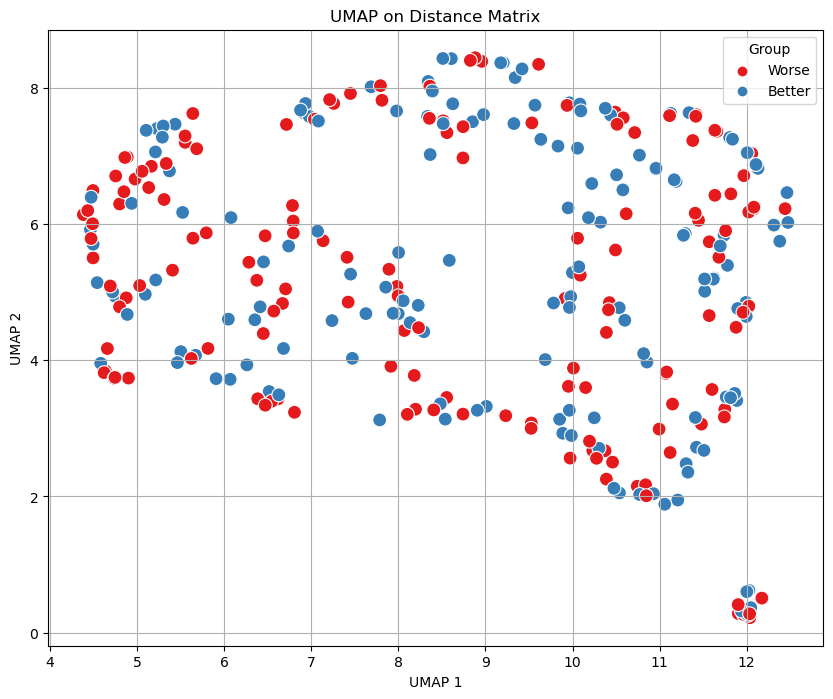

In [4]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming matrix completion is done, and you have a distance matrix
# distance_matrix = mc.distance (from the previous matrix completion step)

# Step 1: Load the distance matrix
# If the distance matrix is already in a file, you can load it. Otherwise, use mc.distance directly.
distance_matrix = pd.read_csv("distance_matrix.csv")

# Step 2: Apply UMAP to the distance matrix
# Initialize UMAP (reduce to 2 dimensions for visualization)
reducer = umap.UMAP(n_components=2, metric='precomputed', random_state=42)

# Since it's a distance matrix, we use the 'precomputed' metric in UMAP
umap_embedding = reducer.fit_transform(distance_matrix)

# Step 3: Assuming you have group labels (e.g., from cleaned_asv_df.csv)
metadata = pd.read_csv('../../../cleaned_asv_df.csv')  # Assuming this has your sample groupings
distance_matrix['Group'] = metadata['Group']  # Add group labels to the matrix




In [ ]:
# Step 4: Plot the UMAP embedding
plt.figure(figsize=(10, 8))
sns.scatterplot(x=umap_embedding[:, 0], y=umap_embedding[:, 1], hue=distance_matrix['Group'], palette='Set1', s=100)
plt.title('UMAP on Distance Matrix')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='Group')
plt.grid(True)
plt.savefig('umap_local_density_plot.png', dpi=300)
plt.show()

/root/anaconda3/envs/qiime2/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/root/anaconda3/envs/qiime2/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/root/anaconda3/envs/qiime2/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/root/anaconda3/envs/qiime2/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/root/anaconda3/envs/qiime2/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: usi

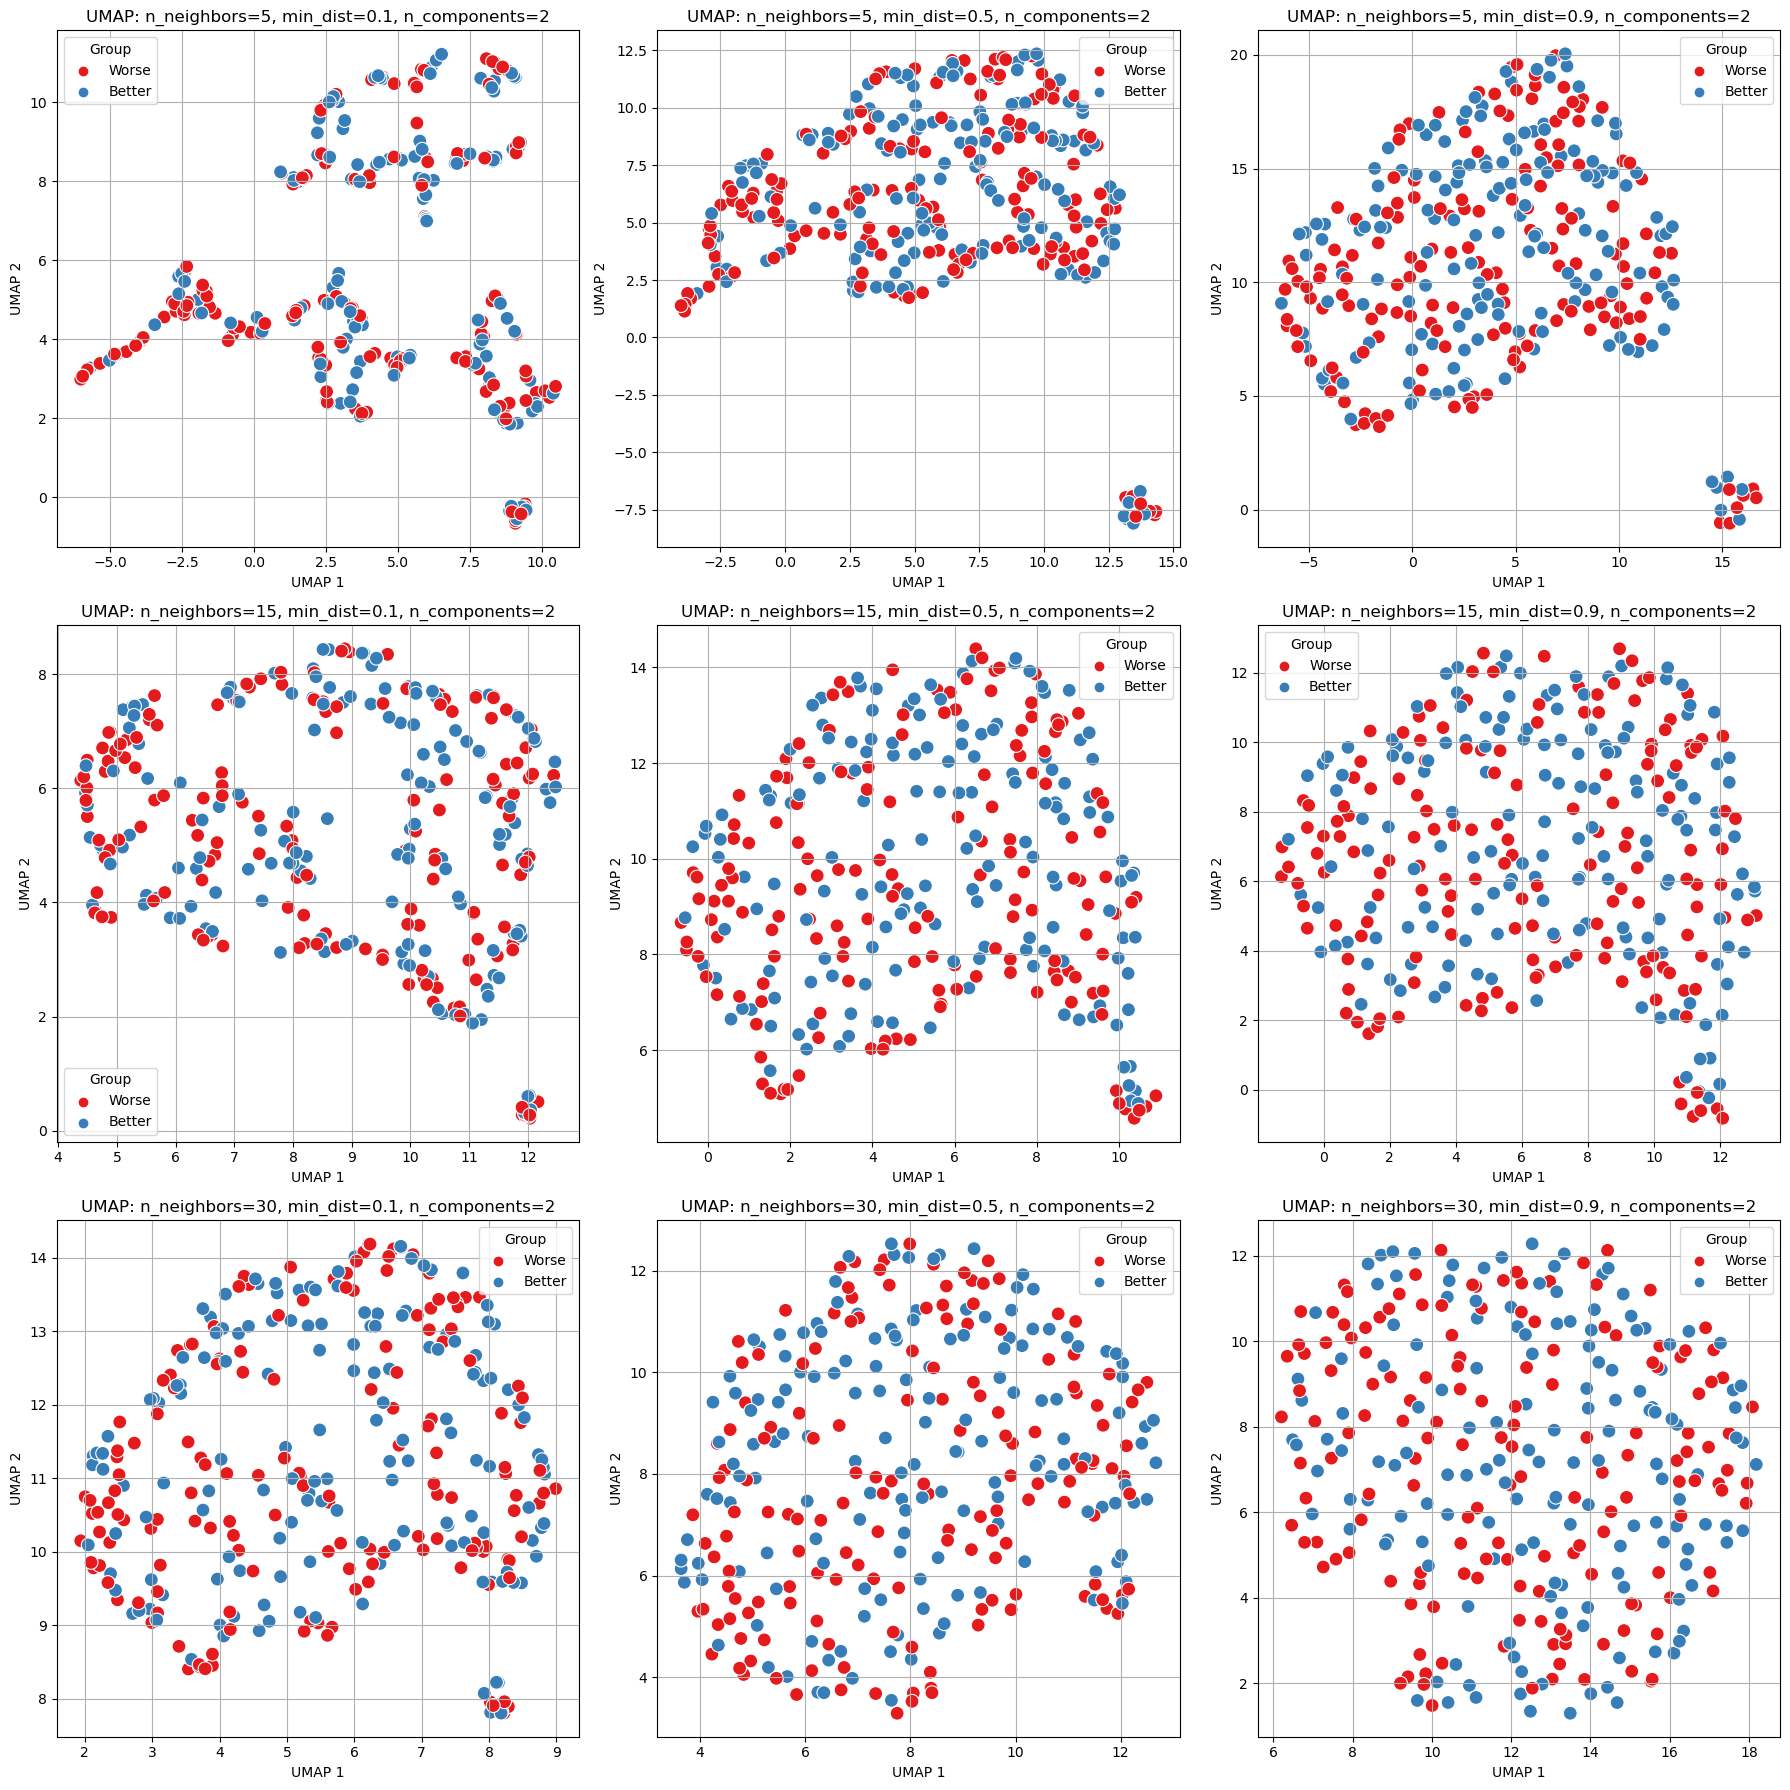

In [8]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Load the distance matrix
distance_matrix = pd.read_csv("distance_matrix.csv")

# Load metadata containing group labels
metadata = pd.read_csv('../../../cleaned_asv_df.csv')  # Assuming this has your sample groupings

# Remove the 'Group' column from the distance matrix (if it's present)
distance_matrix_numeric = distance_matrix.drop(columns=['Group'], errors='ignore')

# Define the different UMAP parameters we want to try
n_neighbors_list = [5, 15, 30]  # 3 values for n_neighbors
min_dist_list = [0.1, 0.5, 0.9]  # 3 values for min_dist
n_components_list = [2]  # 2 or 3 components for visualization

# Create a grid of subplots for all combinations
fig, axes = plt.subplots(len(n_neighbors_list), len(min_dist_list), figsize=(18, 18))

# Iterate over all combinations of n_neighbors, min_dist, and n_components
for (i, n_neighbors), (j, min_dist), n_components in itertools.product(enumerate(n_neighbors_list), enumerate(min_dist_list), n_components_list):
    
    # Initialize UMAP with the current combination of parameters
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components, metric='precomputed', random_state=42)

    # Apply UMAP to the numeric distance matrix
    umap_embedding = reducer.fit_transform(distance_matrix_numeric)

    # Select the correct subplot for this combination of parameters
    ax = axes[i, j]

    # Plot the UMAP embedding for this combination
    sns.scatterplot(x=umap_embedding[:, 0], y=umap_embedding[:, 1], hue=metadata['Group'], palette='Set1', s=100, ax=ax)
    
    # Customize the plot
    ax.set_title(f'UMAP: n_neighbors={n_neighbors}, min_dist={min_dist}, n_components={n_components}')
    ax.set_xlabel(f'UMAP 1')
    ax.set_ylabel(f'UMAP 2')
    ax.grid(True)

# Adjust layout and save the final composite plot
plt.tight_layout()
plt.savefig('umap_composite_plot.png', dpi=300)
plt.show()
